In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
def safelog2(x):
    if x == 0:
        return(0)
    else:
        return(np.log2(x))

In [26]:
training = np.loadtxt("hw05_data_set_train.csv",delimiter = ",")
test = np.loadtxt("hw05_data_set_test.csv",delimiter = ",")
x_train = training[:,0]
y_train = training[:,1]
x_test = test[:,0]
y_test = test[:,1]
N_train = len(y_train)
N_test = len(y_test)

In [27]:
def regression_tree(P):
    node_indices = {}
    is_terminal = {}
    need_split = {}

    node_features = {}
    node_splits = {}
    node_averages = {}
    # put all training instances into the root node
    node_indices[1] = np.array(range(N_train))
    is_terminal[1] = False
    need_split[1] = True
    # learning algorithm
    while True:
    # find nodes that need splitting
        split_nodes = [key for key, value in need_split.items()
                   if value == True]
    # check whether we reach all terminal nodes
        if len(split_nodes) == 0:
            break
    # find best split positions for all nodes
        for split_node in split_nodes:
            data_indices = node_indices[split_node]
            need_split[split_node] = False
            
            if len(data_indices) <= P:
                is_terminal[split_node] = True
                node_averages[split_node] = np.mean(y_train[data_indices])
            
            else:
                is_terminal[split_node] = False

                best_score = 0.0
                best_split = 0.0
            
                unique_values = np.sort(np.unique(x_train[data_indices]))
                split_positions = (unique_values[1:len(unique_values)] + \
                                   unique_values[0:(len(unique_values) - 1)]) / 2
                split_scores = np.repeat(0.0, len(split_positions))
                for s in range(len(split_positions)):
                    left_indices = data_indices[x_train[data_indices] > \
                                   split_positions[s]]
                    right_indices = data_indices[x_train[data_indices] <= \
                                    split_positions[s]]
                
                
                
                    split_scores[s] = (np.sum(np.square(y_train[left_indices] - np.mean(y_train[left_indices]))) + \
                                   np.sum(np.square(y_train[right_indices] - np.mean(y_train[right_indices]))))/ len(data_indices)
                
                
                
                
                
                best_score = np.min(split_scores)
                best_split = split_positions[np.argmin(split_scores)]
            
                node_features[split_node] = best_score
                node_splits[split_node] = best_split
            
                # create left node using the selected split
                left_indices = data_indices[x_train[data_indices] > \
                           best_split]
                node_indices[2 * split_node] = left_indices
                is_terminal[2 * split_node] = False
                need_split[2 * split_node] = True
      
                # create right node using the selected split
                right_indices = data_indices[x_train[data_indices] <= \
                            best_split]
                node_indices[2 * split_node + 1] = right_indices
                is_terminal[2 * split_node + 1] = False
                need_split[2 * split_node + 1] = True
                
                
    y_predicted_train = np.repeat(0.0, N_train)
    for i in range(N_train):
        index = 1
        while True:
            if is_terminal[index] == True:
                y_predicted_train[i] = node_averages[index]
                break
            else:
                if x_train[i] > node_splits[index]:
                    index = index * 2
                else:
                    index = index * 2 + 1
                    
    y_predicted_test = np.repeat(0.0, N_test)
    for i in range(N_test):
        index = 1
        while True:
            if is_terminal[index] == True:
                y_predicted_test[i] = node_averages[index]
                break
            else:
                if x_test[i] > node_splits[index]:
                    index = index * 2
                else:
                    index = index * 2 + 1
    train_error = np.sqrt(np.sum(np.square(y_train - y_predicted_train))/len(y_train))
    test_error = np.sqrt(np.sum(np.square(y_test - y_predicted_test))/len(y_test))
    
    return is_terminal,node_averages,node_splits,train_error,test_error,node_indices
    

In [28]:
P = 30
is_terminal,node_averages,node_splits,train_error,test_error,node_indices = regression_tree(P)


In [29]:
is_terminal

{1: False,
 2: False,
 3: False,
 4: False,
 5: True,
 6: False,
 7: False,
 8: True,
 9: True,
 12: True,
 13: True,
 14: False,
 15: True,
 28: True,
 29: True}

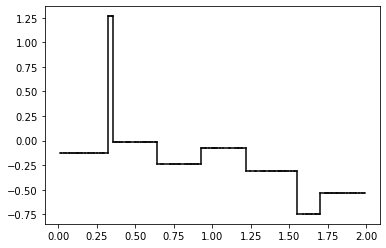

In [30]:
train_dic = {}

for key,value in node_indices.items():
    for v in value:
        if key in node_averages:
            if x_train[v] not in train_dic:
                train_dic[x_train[v]] = node_averages[key]

train_dic = {k: v for k, v in sorted(train_dic.items(), key=lambda item: item[0])}


for b in range(1,len(train_dic)):
    plt.plot([list(train_dic.keys())[b-1], list(train_dic.keys())[b]], [list(train_dic.values())[b], list(train_dic.values())[b]] , "k-")
for b in range(len(train_dic) -1):
    plt.plot([list(train_dic.keys())[b], list(train_dic.keys())[b]], [list(train_dic.values())[b], list(train_dic.values())[b + 1]] , "k-")
plt.show()

In [31]:
# extract rules
terminal_nodes = [key for key, value in is_terminal.items()
                  if value == True]
for terminal_node in terminal_nodes:
    index = terminal_node
    rules = np.array([])
    while index > 1:
        parent = np.floor(index / 2)
        if index % 2 == 0:
            # if node is left child of its parent
            rules = np.append(rules, 
                              "x > {:.2f}".format(node_splits[parent]))
        else:
            # if node is right child of its parent
            rules = np.append(rules,
                              "x <= {:.2f}".format(node_splits[parent]))
        index = parent
    rules = np.flip(rules)
    print("{} => {}".format(rules, node_averages[terminal_node]))

['x > 1.23' 'x <= 1.57'] => -0.3112962962962963
['x > 1.23' 'x > 1.57' 'x > 1.72'] => -0.5294444444444445
['x > 1.23' 'x > 1.57' 'x <= 1.72'] => -0.7458333333333332
['x <= 1.23' 'x > 0.65' 'x > 0.93'] => -0.0726923076923077
['x <= 1.23' 'x > 0.65' 'x <= 0.93'] => -0.23854166666666668
['x <= 1.23' 'x <= 0.65' 'x <= 0.33'] => -0.131
['x <= 1.23' 'x <= 0.65' 'x > 0.33' 'x > 0.36'] => -0.012333333333333333
['x <= 1.23' 'x <= 0.65' 'x > 0.33' 'x <= 0.36'] => 1.265


In [32]:
splits = [np.min(x_train),0.33,0.36,0.65,0.93,1.23,1.57,1.72,np.max(x_train)]
values = [-0.131,1.265,-0.012333333333333333,-0.23854166666666668,-0.0726923076923077,-0.3112962962962963,-0.7458333333333332,-0.5294444444444445]

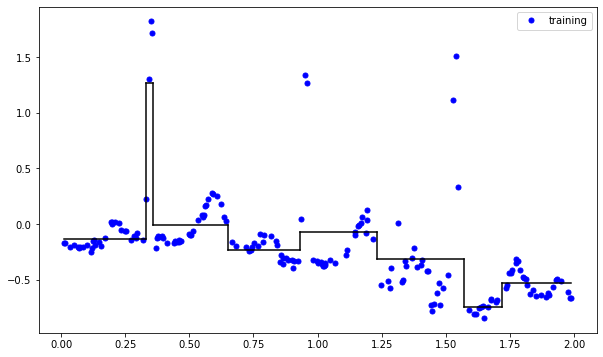

In [33]:
left_borders = splits[:-1]
right_borders = splits[1:]
plt.figure(figsize = (10,6))

plt.plot(x_train,y_train,"b.",markersize = 10,label= "training")
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [values[b], values[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [values[b], values[b + 1]], "k-")

plt.legend(frameon=True)
plt.show()

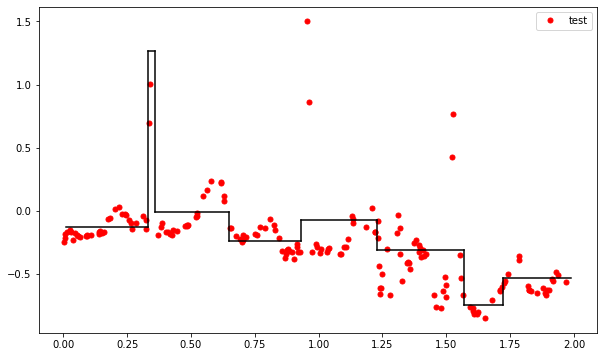

In [34]:
left_borders = splits[:-1]
right_borders = splits[1:]
plt.figure(figsize = (10,6))

plt.plot(x_test,y_test,"r.",markersize = 10,label= "test")
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [values[b], values[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [values[b], values[b + 1]], "k-")

plt.legend(frameon=True)
plt.show()

In [35]:
print("RMSE on training set is " + str(train_error) +" when P is " + str(P))
print("RMSE on training set is " + str(test_error) +" when P is " + str(P))

RMSE on training set is 0.2881929342801884 when P is 30
RMSE on training set is 0.22542236010134897 when P is 30


In [38]:
train_error = {}
test_error = {}
for i in range(10,51,5):
    _,_,_,train,test,_ = regression_tree(i)
    
    train_error[i] = train
    test_error[i] = test
    

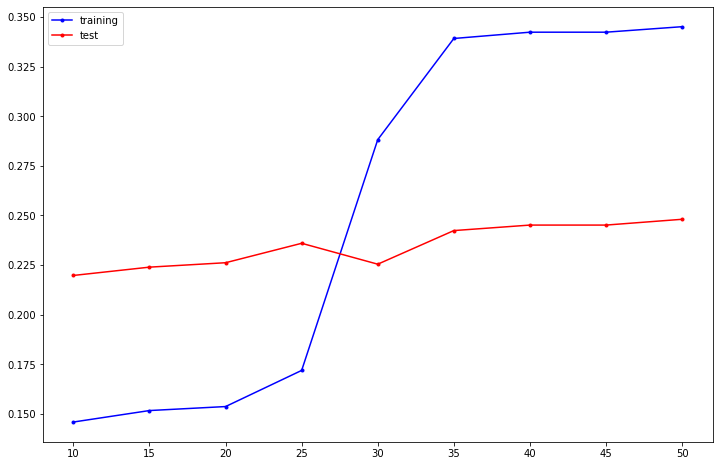

In [39]:
plt.figure(figsize = (12,8))
plt.plot(train_error.keys(),train_error.values(),".b-",label = "training")
plt.plot(test_error.keys(),test_error.values(),".r-",label = "test")
plt.legend(frameon= True)
plt.show()